### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv('Skyserver.csv')

In [3]:
#Let's get an overview of the data
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


**Our objective here is to identify the class of the object.
Now, when we had a look at the Data Dictionary, there were a few columns which are of no use for our model building and will also not be useful in our Exploratory Data Analysis. We should go ahead and drop the following columns.** 
1. objid: This is just an identification number and won't have any significance in our analysis.
2. run: Again, this is a scan identification number and has to be dropped.
3. rerun: This is a reprocessingof run and won't be relevant for the analysis.
4. camcol: It is an ID given to a part of a run and will not be significant at all.
5. field: this is just the field number, which is again not of any use for us.
6. specobjid: A unique bit-encoded 64-bit ID used for optical spectroscopic objects. This is not relevant for our analysis
7. fiberid: Each object is assigned a corresponding fiberID and will be insignificant to our analysis.

In [4]:
df.drop(['objid','run','rerun','camcol','field','specobjid','fiberid'], axis = 1, inplace= True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922


In [5]:
df.shape

(10000, 11)

**We have 10,000 samples and 11 features in the dataset**

In [6]:
#Checking the null values
df.isnull().values.any()

False

**Here, we see there are no NULL values present in the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   class     10000 non-null  object 
 8   redshift  10000 non-null  float64
 9   plate     10000 non-null  int64  
 10  mjd       10000 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 859.5+ KB


**From the above info, it is evident that all the features except one are numerical. Our target feature is a categorical feature. Hence, this is going to be a classification problem.**

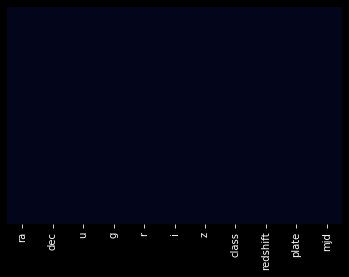

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

**From the above heatmap, it is evident that no NULL values are present in the dataset**

## Summary Statistics

In [9]:
df.describe()

,ra,dec,u,g,r,i,z,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,8410.000000,57481.000000


**Observation**
1. The columns are spread into various different set of ranges. Scaling will be required in this case.
2. In the columns dec, redshift, plate and mjd, mean is greater than the median. This means that the data is right skewed.
3. The difference in 75% and max is high in ra, r, i, z, redshift and plate. hence, we have outliers present in these columns which have to be removed.

### Exploring Data Variables

In [10]:
#checking out the correlation between variables
df.corr()

,ra,dec,u,g,r,i,z,redshift,plate,mjd
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.030307,-0.095329,-0.086887
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.067021,0.088342,0.066147
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741,-0.129430,-0.168793
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576,-0.054981,-0.092772
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080,0.019787,-0.009345
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450,0.072958,0.050896
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034,0.112397,0.095658
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000,-0.038091,-0.057957
plate,-0.095329,0.088342,-0.129430,-0.054981,0.019787,0.072958,0.112397,-0.038091,1.000000,0.966881
mjd,-0.086887,0.066147,-0.168793,-0.092772,-0.009345,0.050896,0.095658,-0.057957,0.966881,1.000000


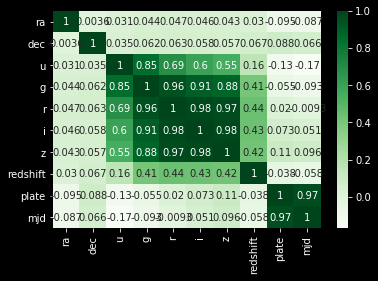

In [11]:
#Let us see the heatmap for a better understanding
sns.heatmap(df.corr(),annot=True,cmap='Greens')

We can see good amount of positive correlation between a few attributes like u,g, r , i and z. 

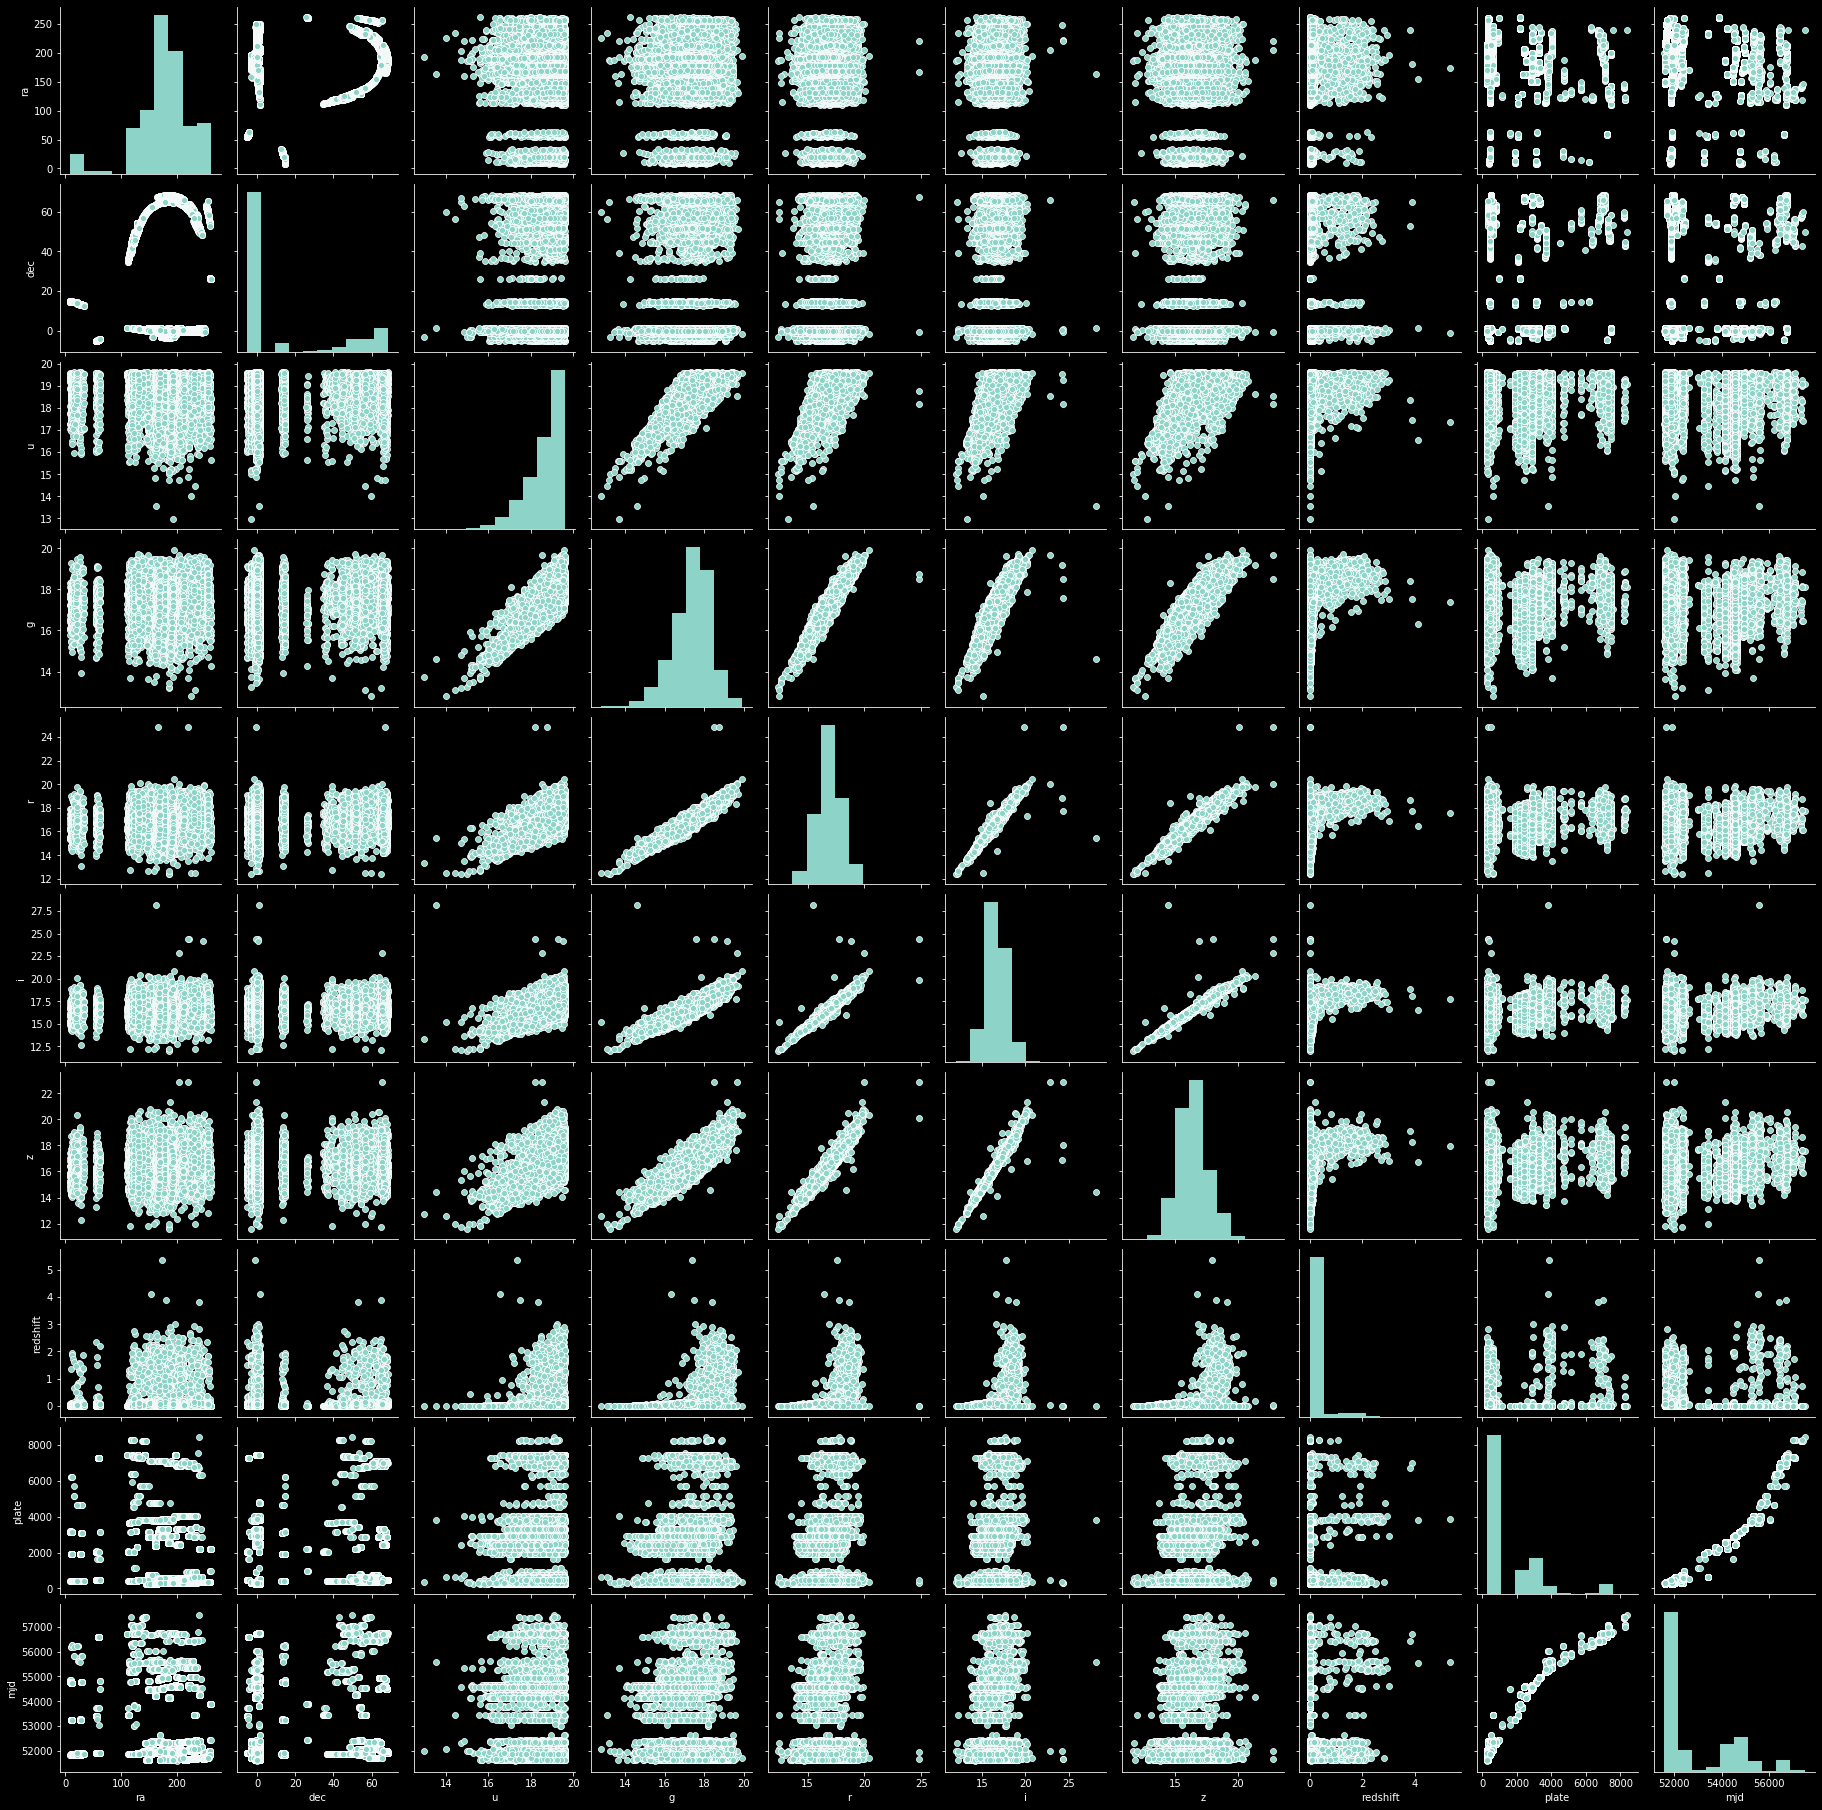

In [12]:
sns.pairplot(df)

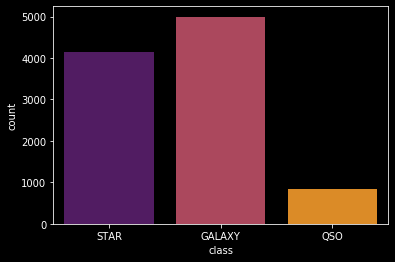

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [13]:
sns.countplot(df['class'], palette = 'inferno')
plt.show()
print(df['class'].value_counts())

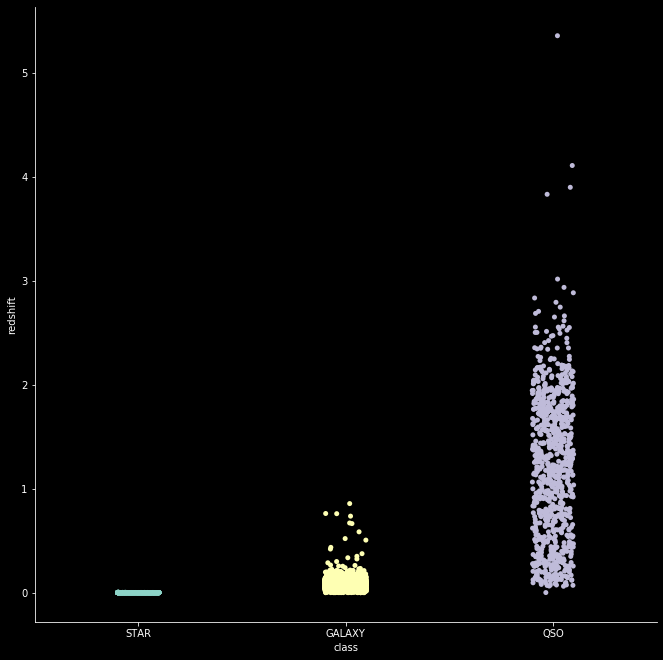

In [14]:
sns.catplot(y='redshift', x='class', data=df)
fig = plt.gcf()
fig.set_size_inches(10,10)

**Stars have the lowest average redshift, while Quasars have the highest. Redshift looks like a very strong predictor in our model to be.**

### Checking Skewness

In [15]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

**Although there is a bit of skewness in a few columns, while fixing, it returned NaN values.**

### Converting categorical columns into numeric

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [17]:
df

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,267,182
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,49,6
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,21,80
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,267,182
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,267,182
...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0,0.027583,111,37
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0,0.117772,111,37
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,2,-0.000402,459,341
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0,0.014019,111,37


In [18]:
print(df['class'].value_counts())

0    4998
2    4152
1     850
Name: class, dtype: int64


### Outlier Check

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9956, 9973, 9997], dtype=int64), array([ 8,  8,  8, ...,  8, 10, 10], dtype=int64))


**This indicates that outliers are present in our dataset. If these outliers are not treated, our model will gravitate towards them**

In [20]:
df1=df[(z<3).all(axis=1)]

In [21]:
#Checking the shape
print(df.shape,'\t\t',df1.shape)

(10000, 11) 		 (9039, 11)


In [22]:
10000-9039

961

**We had 961 outliers in our dataset which have been removed now**

## Model Training

In [23]:
df1.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,267,182
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,49,6
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,21,80
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,267,182
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,267,182


In [24]:
#Splitting the data into input and output variable
x=df1.drop(columns=['class'], axis=1)
x.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,267,182
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,49,6
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,21,80
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,267,182
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,267,182


In [25]:
y=df1['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [26]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [27]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [28]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(7231, 10) 		 (1808, 10)


In [29]:
# Importing the model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

### Finding the best parameters

In [30]:
#Using GridsearchCV to find out the best parameter in LogisticRegression

parameters={'C':[1,10], 'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [31]:
#Using GridsearchCV to find out the best parameter in KNN

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 23}


In [32]:
# Models with its best parameters

LR= LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [33]:
#Applying all the algorithms using for loop
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.9828539823008849
[[942   4  13]
 [ 12  72   1]
 [  1   0 763]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       959
           1       0.95      0.85      0.89        85
           2       0.98      1.00      0.99       764

    accuracy                           0.98      1808
   macro avg       0.97      0.94      0.96      1808
weighted avg       0.98      0.98      0.98      1808

*****************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is
0.9773230088495575
[[940  17   2]
 [ 12  72   1]
 [  3   6 755]]
              precisio

### Cross Validation of the Models

In [34]:
#Applying all the algorithms using for loop
models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model: ',m)
    print('Score: ',score)
    print('Mean Score: ',score.mean())
    print('Standard Deviation', score.std())
    print('***********************************************')
    print('\n')

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score:  [0.98340708 0.97787611 0.99115044 0.98230088 0.98783186 0.9800885
 0.98451327 0.97566372 0.98672566 0.97895903]
Mean Score:  0.9828516547594548
Standard Deviation 0.004596337912420257
***********************************************


Model:  GaussianNB(priors=None, var_smoothing=1e-09)
Score:  [0.98230088 0.98340708 0.9789823  0.98230088 0.97676991 0.98340708
 0.96681416 0.96792035 0.97566372 0.97563677]
Mean Score:  0.9773203138015857
Standard Deviation 0.005754058841573661
***********************************************


Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, ga

**Using the above models, Decision Trees have given the best score. Now we are going to use the boosting technique to further improve the score**

### Ensembling

In [35]:
#Importing the ensembling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
#Applying all the algorithms using for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************')
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is
0.9861725663716814
[[952   5   2]
 [ 16  68   1]
 [  1   0 763]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.93      0.80      0.86        85
           2       1.00      1.00      1.00       764

    accuracy                           0.99      1808
   macro avg       0.97      0.93      0.95      1808
weighted avg       0.99      0.99      0.

In [37]:
#Cross validation of scores after boosting
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model: ',m)
    print('Score: ',score)
    print('Mean Score: ',score.mean())
    print('Standard Deviation', score.std())
    print('***********************************************')
    print('\n')

Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score:  [0.98783186 0.99115044 0.99004425 0.99004425 0.99225664 0.99336283
 0.98561947 0.98119469 0.99336283 0.98560354]
Mean Score:  0.9890470800380247
Standard Deviation 0.0037511165448374986
***********************************************


Model:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score:  [0.92256637 0.93362832 0.95243363 0.79756637 0.587

**So, we have the highest accuracy score of 98.91 through Gradient Boosting Classifier**

In [42]:
# GBC with best results
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9861725663716814
[[951   7   1]
 [ 13  71   1]
 [  3   0 761]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.91      0.84      0.87        85
           2       1.00      1.00      1.00       764

    accuracy                           0.99      1808
   macro avg       0.96      0.94      0.95      1808
weighted avg       0.99      0.99      0.99      1808



Text(0.5, 1, 'Confusion Matrix- bagging Classifier')

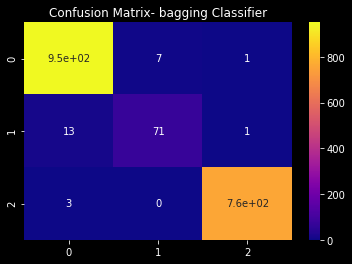

In [43]:
#Plotting a confusion matrix for Bagging Classifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cmap='plasma')
plt.title('Confusion Matrix- bagging Classifier')

In [44]:
#Saving the model
from sklearn.externals import joblib
#Save the model as a pickle in a file
joblib.dump(gbc,'SpaceServer.obj')

['SpaceServer.obj']